# Read and Parse Chainer logs

# CIFAR100 runs with same hyper-parameters
## 24 runs x 500 epochs on DL server 
b512 l0.15

### Fix LR after 4 updates (after 25 x 4 epochs)

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os

In [4]:
!ls logs/series/experiment03

cifar_fixLR_e500_run_0.log  cifar_fixLR_e500_run_2.log
cifar_fixLR_e500_run_1.log  cifar_fixLR_e500_run_3.log
cifar_fixLR_e500_run_10.log cifar_fixLR_e500_run_4.log
cifar_fixLR_e500_run_11.log cifar_fixLR_e500_run_5.log
cifar_fixLR_e500_run_12.log cifar_fixLR_e500_run_6.log
cifar_fixLR_e500_run_13.log cifar_fixLR_e500_run_7.log
cifar_fixLR_e500_run_14.log cifar_fixLR_e500_run_8.log
cifar_fixLR_e500_run_15.log cifar_fixLR_e500_run_9.log


In [5]:
filename_pattern=re.compile(r"cifar_fixLR_e500.*\.log")

In [6]:
logs_directory =  "logs/series/experiment03"
list_command = "ls -1 "+logs_directory
files=[]
proc = subprocess.Popen(list_command.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    line = line.strip(" \n")
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logs_directory,line)))
files

['/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_0.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_1.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_10.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_11.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_12.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_13.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_14.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_15.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/experiment03/cifar_fixLR_e500_run_2.log',
 '/Users/peterbryzgalov/work/ML

In [7]:
run_pattern = re.compile(r"cifar_.*run_(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
def fileToDF(logfile):
    remove_str="[J"
    global run_pattern
    global output_pattern
    m = run_pattern.search(logfile)
    if m:
        run = int(m.group(1))        
    else:
        print "No match in filename:",logfile
        return None
    with open(logfile,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0
        ind = 0
        loss = 0
        acc = 0
        learn = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
        for line in lines:
            s = line.strip(' \n')
            s = s.replace(remove_str,"")
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1
                    
    return df

In [8]:
df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(6480, 5)


,run,epoch,loss,acc,time
0,0.0,1.0,4.58775,0.012086,24.1540
1,0.0,2.0,4.67405,0.010892,47.7167
2,0.0,3.0,4.52949,0.024345,71.2630
3,0.0,4.0,4.73494,0.014005,95.1632
4,0.0,5.0,4.22076,0.035553,119.1810


In [9]:
df_loss = df.pivot(index="epoch",columns="run")["loss"]
df_acc = df.pivot(index="epoch",columns="run",values="acc")
df_time = df.pivot(index="epoch",columns="run",values="time")
df_acc.head()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
epoch,,,,,,,,,,,,,,,,
1.0,0.012086,0.010380,0.009168,0.011173,0.012173,0.010197,0.014591,0.018974,0.012638,0.013701,0.009938,0.012833,0.009938,0.017434,0.010352,0.014861
2.0,0.010892,0.013919,0.016739,0.010317,0.019009,0.010110,0.010587,0.021146,0.010587,0.013701,0.010110,0.018974,0.010197,0.010110,0.017044,0.020514
3.0,0.024345,0.021697,0.017997,0.010208,0.028510,0.012063,0.026603,0.034857,0.012649,0.016607,0.010208,0.022151,0.009938,0.010317,0.030710,0.021025
4.0,0.014005,0.030308,0.034295,0.013212,0.024161,0.016923,0.032893,0.039803,0.013919,0.017228,0.013810,0.017618,0.021490,0.012443,0.038838,0.033410
5.0,0.035553,0.021404,0.026792,0.018899,0.025276,0.015493,0.041245,0.058410,0.025236,0.014200,0.029412,0.033651,0.020439,0.017934,0.043658,0.032611


In [10]:
df_time.tail()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
epoch,,,,,,,,,,,,,,,,
496.0,11909.9,11926.4,11930.2,11833.0,12060.7,11869.0,11850.2,11787.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497.0,11934.1,11950.6,11954.4,11856.9,12085.1,11893.0,11874.2,11811.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498.0,11957.9,11974.5,11978.3,11880.7,12109.3,11916.8,11897.9,11834.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499.0,11982.1,11998.6,12002.4,11904.6,12133.7,11940.9,11921.9,11858.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500.0,12006.2,12022.8,12026.6,11928.6,12158.1,11964.9,11945.9,11882.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def plot(df,**kwargs):
    ax = df.plot(**kwargs)
    ax.set_xlim(0,500)
    major = np.arange(0,501,100)
    ax.set_xticks(major)
    ax.xaxis.grid(which="major", linestyle=":",color="#cccccc")
    minor = np.arange(25,476,25)
    ax.set_xticks(minor, minor=True)
    ax.xaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.5)
    ax.yaxis.grid(linestyle="-",color="black",alpha=0.05)
    return ax

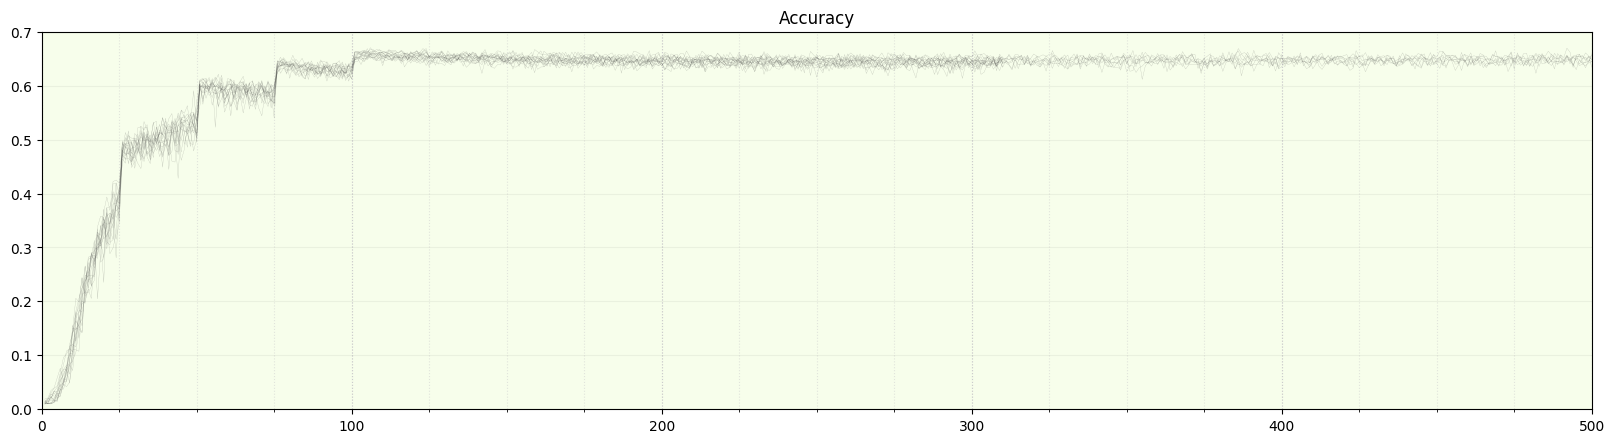

In [12]:
ax = plot(df_acc,legend=False,figsize=(20,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_ylim(0,.7)
ax.set_facecolor("#F7FEEB")

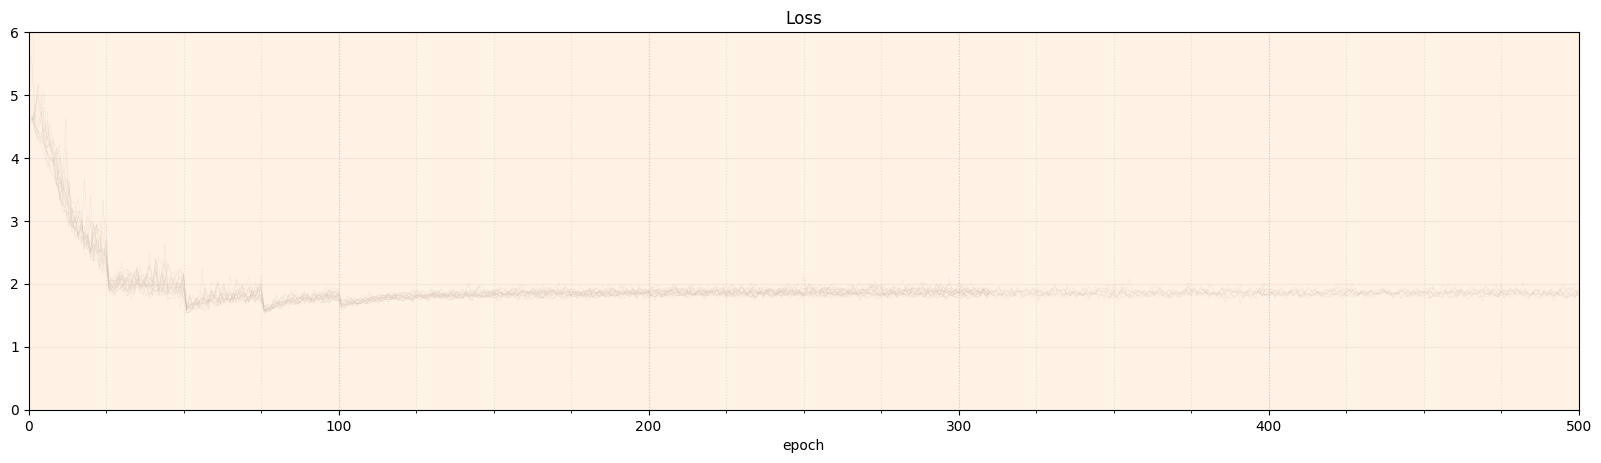

In [13]:
ax = plot(df_loss,legend=False,figsize=(20,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_ylim(0,6)
ax.set_facecolor("#FEF3E5")

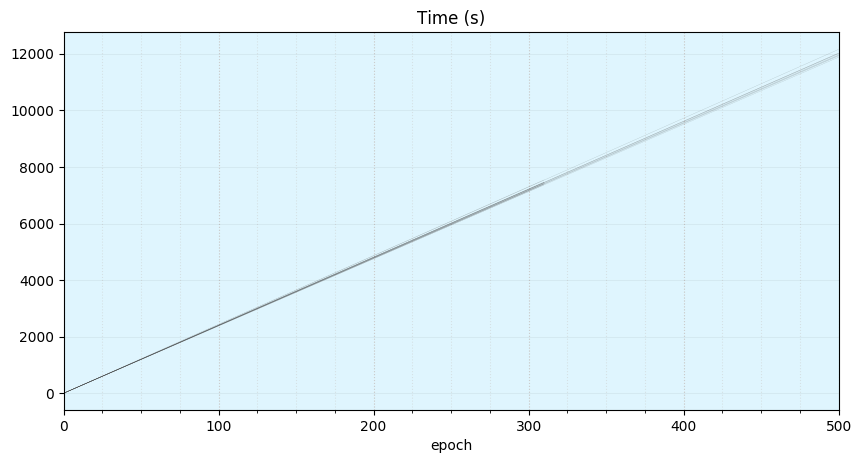

In [14]:
ax = plot(df_time,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Time (s)")
#ax.set_ylabel("s")
ax.set_facecolor("#00B7FA20")

In [139]:
# Save data to CSV files
logfile = os.path.join(logs_directory,"cifar_e500")
df_loss.to_csv(logfile+"-loss.csv")
df_acc.to_csv(logfile+"-acc.csv")
df_time.to_csv(logfile+"-time.csv")

In [13]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [16]:
slice_epoch = [20.,25.,40.,50.,200.,500.]
df_loss.iloc[-3:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
498.0,1.81939,1.79402,1.80293,1.80973,1.83211,1.79469,1.80163,1.80814,1.82611,1.78958,...,1.78854,1.78910,1.78775,1.80686,1.78932,1.81226,1.79071,1.78660,1.80727,1.80669
499.0,1.81122,1.79418,1.79870,1.80697,1.83592,1.79338,1.80714,1.80411,1.83864,1.78253,...,1.79650,1.78919,1.78365,1.80557,1.80159,1.81611,1.78737,1.77671,1.81166,1.82513
500.0,1.81856,1.79908,1.80410,1.81003,1.83988,1.80571,1.81240,1.80712,1.84095,1.77764,...,1.79210,1.79320,1.79716,1.80429,1.79522,1.82812,1.77283,1.78016,1.81302,1.82323


In [17]:
df_loss_p = df_loss.copy()
df_acc_p = df_acc.copy()
df_time_p = df_time.copy()
i = 0
index = []
for i in range(0,len(slice_epoch)):
    name = str(int(slice_epoch[i]))
    index.append(name)
    df_loss_p.loc[name] = RelativePercentDifference(df_loss_p.loc[slice_epoch[i]])
    df_acc_p.loc[name] = RelativePercentDifference(df_acc_p.loc[slice_epoch[i]])
    df_time_p.loc[name] = RelativePercentDifference(df_time_p.loc[slice_epoch[i]])
df_loss_p.iloc[-5:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0
epoch,,,,,,,,,,,,,,,,,,,,,
25,100.891049,102.240001,117.818263,98.932118,104.638816,87.971219,105.051437,96.499527,97.459867,87.183008,...,94.549142,99.216964,96.735136,106.310459,104.941161,95.674286,96.108881,88.845292,95.893618,99.711377
40,91.999272,95.411774,101.274644,96.723328,87.947479,104.691576,99.690444,100.021654,104.788527,94.599250,...,94.024430,103.905627,102.708741,108.854100,98.420721,98.697796,95.343859,96.921661,90.913118,105.246710
50,96.764255,101.091950,109.967721,99.163348,107.387197,103.419802,100.980734,105.233600,105.940362,99.964925,...,103.198908,95.636718,88.162681,100.360075,96.868809,95.768435,95.277443,101.563978,98.042473,108.124197
200,101.369512,99.151720,100.972726,100.787079,101.247595,99.737479,100.273362,100.657957,101.183865,98.417444,...,98.555432,99.563469,98.905668,99.949172,98.585357,100.364246,98.767125,99.406085,100.054465,100.492260
500,100.692027,99.613437,99.891390,100.219729,101.872496,99.980534,100.350954,100.058605,101.931741,98.426324,...,99.226961,99.287867,99.507129,99.901910,99.399712,101.221356,98.159998,98.565854,100.385282,100.950601


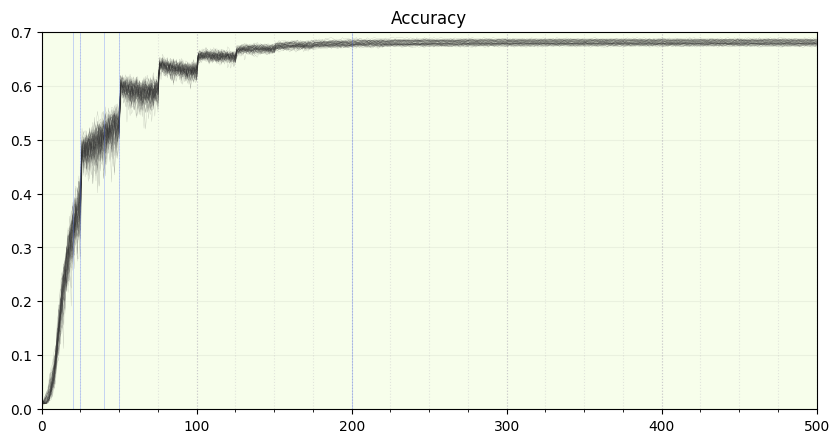

In [50]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_facecolor("#F7FEEB")
ax.set_ylim(0,0.7)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [0,0.7]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70",linestyle="-")

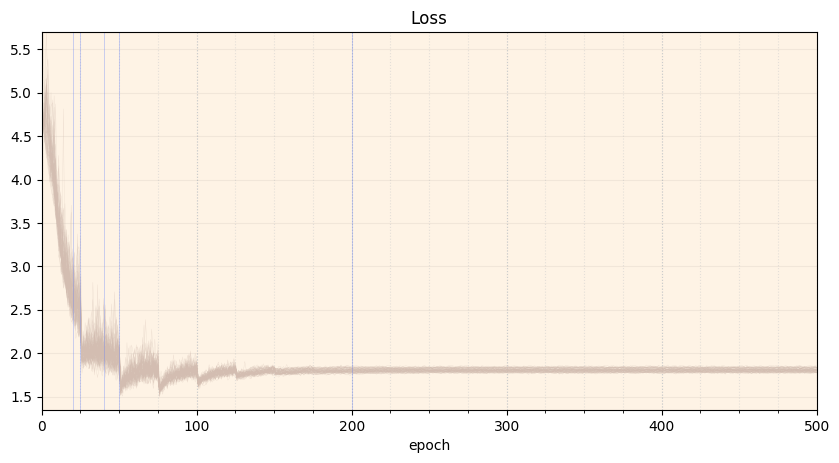

In [51]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [ymin,ymax]
    ax.plot(xx,yy,lw=0.5,color="#5577FF70")

In [20]:
def plotBox(df, **kwargs):
    boxcolor=(.3,.3,.3)
    meanlineprops = dict(linewidth=1, color=(.7,.7,.8), linestyle="--")
    medianprops = dict(linestyle='-', linewidth=1)
    color = dict(caps=boxcolor,whiskers=boxcolor,boxes=boxcolor, medians=boxcolor)
    (ax,lines) = df.plot.box(showmeans=True, meanline=True, patch_artist=False,
                    color=color, meanprops=meanlineprops, medianprops=medianprops,
                    return_type='both',**kwargs)
#    print lines.keys()
    ax.yaxis.grid(linestyle=":",color="#cccccc")
# #     plotText(ax, lines)
# #     ["medians"],"median")
# #     plotText(ax, lines["means"],"mean")
# #     plotText(ax, lines["boxes"],"quartile")
# #     plotText(ax, lines["caps"],"caps")
# #    box = ax.artists[0]
#     #box.set_facecolor("#eeeeee")
    
#     for median in lines["medians"]:
#         x,y = median.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]-0.0001, 'median', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
#     for mean in lines["means"]:
#         x,y = mean.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]+0.0007, 'mean', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
    return ax

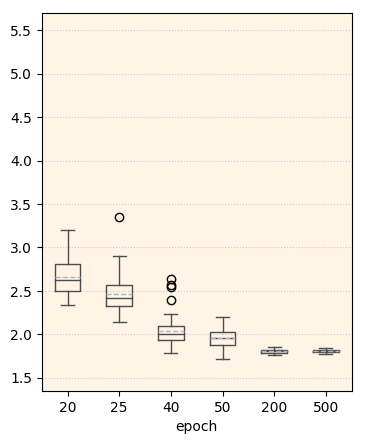

In [68]:
ax = plotBox(df_loss_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Loss")
ax.set_xlabel("epoch")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1
ax.set_ylim(ymin,ymax)
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_facecolor("#FFAC3620")

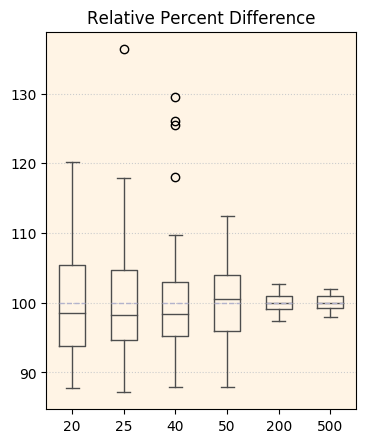

In [31]:
ax = plotBox(df_loss_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
ax.set_facecolor("#FFAC3620")

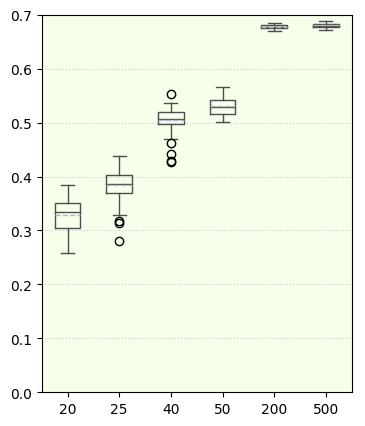

In [69]:
ax = plotBox(df_acc_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Accuracy")
#ax.set_xlabel("epoch")
ax.set_xticklabels(df_loss_p.loc[slice_epoch].index.map(lambda x: str(int(x))))
ax.set_ylim(0,0.7)
ax.set_facecolor("#CBFF7725")

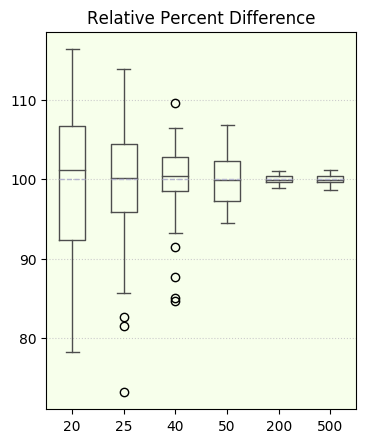

In [33]:
ax = plotBox(df_acc_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
#ax.set_xlabel("epoch")
ax.set_facecolor("#CBFF7725")